<a href="https://colab.research.google.com/github/khushigiri87/Pneumonia-Detection-Project/blob/main/Pneumonia_Detection_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os

folders = [
    "Pneumonia-Detection-Project/dataset/train/Pneumonia",
    "Pneumonia-Detection-Project/dataset/train/Normal",
    "Pneumonia-Detection-Project/dataset/val/Pneumonia",
    "Pneumonia-Detection-Project/dataset/val/Normal",
    "Pneumonia-Detection-Project/dataset/test/Pneumonia",
    "Pneumonia-Detection-Project/dataset/test/Normal",
    "Pneumonia-Detection-Project/model",
    "Pneumonia-Detection-Project/results",
    "Pneumonia-Detection-Project/notebooks"
]

for f in folders:
    os.makedirs(f, exist_ok=True)

print("Folder structure created successfully ✅")


Folder structure created successfully ✅


In [ ]:
!pip install kagglehub


In [ ]:
import kagglehub

path = kagglehub.dataset_download("paultimothymooney/chest-xray-pneumonia")
print("Path to dataset files:", path)


Using Colab cache for faster access to the 'chest-xray-pneumonia' dataset.
Path to dataset files: /kaggle/input/chest-xray-pneumonia


In [ ]:
import os

print(os.listdir("/kaggle/input/chest-xray-pneumonia"))


['chest_xray']


In [ ]:
import shutil

source = "/kaggle/input/chest-xray-pneumonia/chest_xray"
destination = "Pneumonia-Detection-Project/dataset"

shutil.copytree(source, destination, dirs_exist_ok=True)

print("Dataset copied successfully ✅")


Dataset copied successfully ✅


In [ ]:
import os

print(os.listdir("Pneumonia-Detection-Project/dataset"))
print(os.listdir("Pneumonia-Detection-Project/dataset/train"))


['train', 'test', 'val', 'chest_xray', '__MACOSX']
['NORMAL', 'PNEUMONIA', 'Pneumonia', 'Normal']


In [ ]:
import shutil
import os

base_path = "Pneumonia-Detection-Project/dataset/train"

# delete duplicate folders
for folder in ["Normal", "Pneumonia"]:
    path = os.path.join(base_path, folder)
    if os.path.exists(path):
        shutil.rmtree(path)
        print(f"Deleted {folder}")

print("Duplicate class folders removed ✅")


Deleted Normal
Deleted Pneumonia
Duplicate class folders removed ✅


In [ ]:
import os

print("Dataset folders:", os.listdir("Pneumonia-Detection-Project/dataset"))
print("Train classes:", os.listdir("Pneumonia-Detection-Project/dataset/train"))
print("Val classes:", os.listdir("Pneumonia-Detection-Project/dataset/val"))
print("Test classes:", os.listdir("Pneumonia-Detection-Project/dataset/test"))


Dataset folders: ['train', 'test', 'val', 'chest_xray', '__MACOSX']
Train classes: ['NORMAL', 'PNEUMONIA']
Val classes: ['NORMAL', 'PNEUMONIA', 'Pneumonia', 'Normal']
Test classes: ['NORMAL', 'PNEUMONIA', 'Pneumonia', 'Normal']


In [ ]:
import shutil
import os

folders = [
    "Pneumonia-Detection-Project/dataset/val",
    "Pneumonia-Detection-Project/dataset/test"
]

for base in folders:
    for dup in ["Normal", "Pneumonia"]:
        path = os.path.join(base, dup)
        if os.path.exists(path):
            shutil.rmtree(path)
            print(f"Deleted {dup} from {base}")

print("Val & Test duplicate folders removed ✅")


Deleted Normal from Pneumonia-Detection-Project/dataset/val
Deleted Pneumonia from Pneumonia-Detection-Project/dataset/val
Deleted Normal from Pneumonia-Detection-Project/dataset/test
Deleted Pneumonia from Pneumonia-Detection-Project/dataset/test
Val & Test duplicate folders removed ✅


In [ ]:
extra = [
    "Pneumonia-Detection-Project/dataset/chest_xray",
    "Pneumonia-Detection-Project/dataset/__MACOSX"
]

for folder in extra:
    if os.path.exists(folder):
        shutil.rmtree(folder)
        print(f"Deleted {folder}")

print("Extra folders cleaned ✅")


Deleted Pneumonia-Detection-Project/dataset/chest_xray
Deleted Pneumonia-Detection-Project/dataset/__MACOSX
Extra folders cleaned ✅


In [ ]:
import os

print("Dataset folders:", os.listdir("Pneumonia-Detection-Project/dataset"))
print("Train:", os.listdir("Pneumonia-Detection-Project/dataset/train"))
print("Val:", os.listdir("Pneumonia-Detection-Project/dataset/val"))
print("Test:", os.listdir("Pneumonia-Detection-Project/dataset/test"))


Dataset folders: ['train', 'test', 'val']
Train: ['NORMAL', 'PNEUMONIA']
Val: ['NORMAL', 'PNEUMONIA']
Test: ['NORMAL', 'PNEUMONIA']


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = 224
BATCH_SIZE = 32

train_dir = "Pneumonia-Detection-Project/dataset/train"
val_dir   = "Pneumonia-Detection-Project/dataset/val"

train_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    zoom_range=0.2,
    horizontal_flip=True
)

val_gen = ImageDataGenerator(rescale=1./255)

train_data = train_gen.flow_from_directory(
    train_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="binary"
)

val_data = val_gen.flow_from_directory(
    val_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="binary"
)

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    MaxPooling2D(),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10
)

model.save("Pneumonia-Detection-Project/model/pneumonia_model.h5")
print("Model trained & saved successfully ✅")


Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 677s 4s/step - accuracy: 0.7568 - loss: 0.5252 - val_accuracy: 0.8125 - val_loss: 0.6949
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 686s 4s/step - accuracy: 0.8748 - loss: 0.3061 - val_accuracy: 0.6250 - val_loss: 1.0012
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 674s 4s/step - accuracy: 0.8836 - loss: 0.2778 - val_accuracy: 0.6250 - val_loss: 1.0945
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 675s 4s/step - accuracy: 0.9097 - loss: 0.2213 - val_accuracy: 0.6250 - val_loss: 1.2456
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 673s 4s/step - accuracy: 0.9224 - loss: 0.2056 - val_accuracy: 0.6250 - val_loss: 0.8593
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 663s 4s/step - accuracy: 0.9279 - loss: 0.1846 - val_accuracy: 0.6250 - val_loss: 0.9900
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 664s 4s/step - accuracy: 0.9209 - loss: 0.1871 - val_accuracy: 0.8125 - val_loss: 0.6086
Epoch 8/10
163/

Model trained & saved successfully ✅


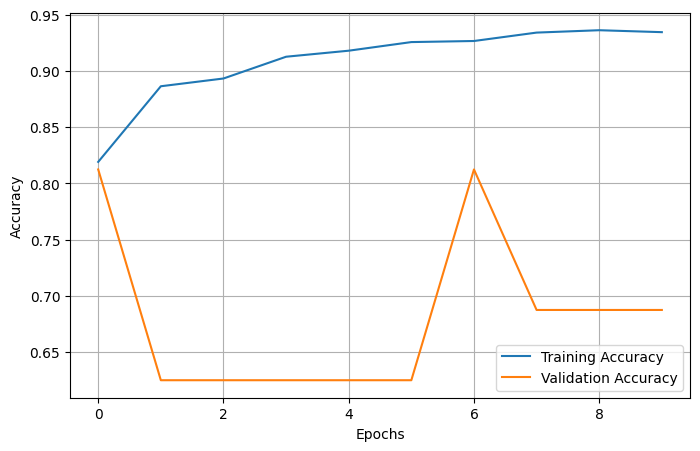

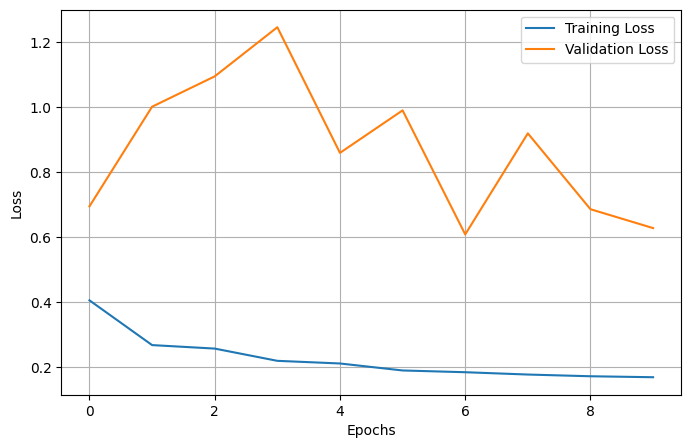

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.savefig("Pneumonia-Detection-Project/results/accuracy_plot.png")
plt.show()

plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.savefig("Pneumonia-Detection-Project/results/loss_plot.png")
plt.show()


In [ ]:
from tensorflow.keras.models import load_model

# Load trained model
model = load_model("Pneumonia-Detection-Project/model/pneumonia_model.h5")

# Test data generator
test_gen = ImageDataGenerator(rescale=1./255)

test_data = test_gen.flow_from_directory(
    "Pneumonia-Detection-Project/dataset/test",
    target_size=(224, 224),
    batch_size=32,
    class_mode="binary",
    shuffle=False
)

# Evaluate on test set
test_loss, test_accuracy = model.evaluate(test_data)
print(f"Test Accuracy: {test_accuracy*100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")


Found 624 images belonging to 2 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


20/20 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.8499 - loss: 0.4589
Test Accuracy: 89.90%
Test Loss: 0.3048


20/20 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step


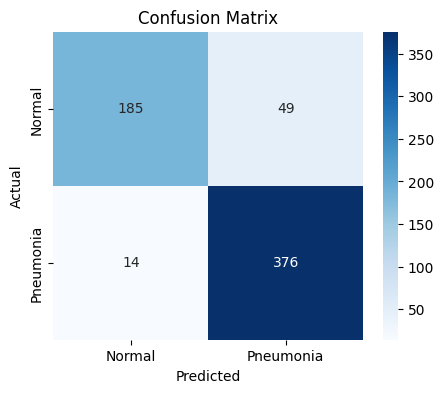

              precision    recall  f1-score   support

      Normal       0.93      0.79      0.85       234
   Pneumonia       0.88      0.96      0.92       390

    accuracy                           0.90       624
   macro avg       0.91      0.88      0.89       624
weighted avg       0.90      0.90      0.90       624



In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# True labels & predictions
y_true = test_data.classes
y_pred_prob = model.predict(test_data)
y_pred = (y_pred_prob > 0.5).astype(int).ravel()

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

# Plot
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Normal", "Pneumonia"],
            yticklabels=["Normal", "Pneumonia"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.savefig("Pneumonia-Detection-Project/results/confusion_matrix.png")
plt.show()

# Classification Report
print(classification_report(y_true, y_pred, target_names=["Normal", "Pneumonia"]))


In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

model = load_model("Pneumonia-Detection-Project/model/pneumonia_model.h5")

img_path = "Pneumonia-Detection-Project/dataset/test/PNEUMONIA/person1_virus_6.jpeg"

img = image.load_img(img_path, target_size=(224,224))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

prediction = model.predict(img_array)[0][0]

if prediction > 0.5:
    print(f"PREDICTION: PNEUMONIA ({prediction:.2f})")
else:
    print(f"PREDICTION: NORMAL ({1-prediction:.2f})")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step
PREDICTION: PNEUMONIA (1.00)


In [ ]:
print("Raw prediction probability:", prediction)

if prediction > 0.8:
    print("High confidence Pneumonia detected")
elif prediction > 0.5:
    print("Moderate confidence Pneumonia detected")
else:
    print("Normal chest X-ray detected")


Raw prediction probability: 0.9998626
High confidence Pneumonia detected


In [ ]:
model.save("Pneumonia-Detection-Project/model/pneumonia_model.keras")
print("Model saved in modern Keras format ✅")


Model saved in modern Keras format ✅


In [ ]:
img_path = "Pneumonia-Detection-Project/dataset/test/PNEUMONIA/person1946_bacteria_4874.jpeg"


In [ ]:
from google.colab import files

uploaded = files.upload()


Saving X-Ray-image.jpg to X-Ray-image.jpg


In [ ]:
uploaded.keys()


dict_keys(['X-Ray-image.jpg'])

In [ ]:
import os
os.listdir()


['.config', 'X-Ray-image.jpg', 'Pneumonia-Detection-Project', 'sample_data']

In [ ]:
import shutil

uploaded_image = "X-Ray-image.jpg"   # exact filename
label = "PNEUMONIA"                  # ya "NORMAL" (jo sahi ho)

destination = f"Pneumonia-Detection-Project/dataset/train/{label}/"

shutil.copy(uploaded_image, destination)
print("Uploaded image training dataset me add ho gayi ✅")


Uploaded image training dataset me add ho gayi ✅


In [ ]:
import tensorflow as tf

# Enable eager execution (FIX)
tf.config.run_functions_eagerly(True)

# Re-compile model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Retrain for 1 epoch
model.fit(
    train_data,
    epochs=1
)

print("Model successfully retrained with new uploaded image ✅")


/usr/local/lib/python3.12/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


164/164 ━━━━━━━━━━━━━━━━━━━━ 796s 5s/step - accuracy: 0.9504 - loss: 0.1234
Model successfully retrained with new uploaded image ✅


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

# uploaded image ka exact naam
img_path = "X-Ray-image.jpg"

# load & preprocess
img = image.load_img(img_path, target_size=(224,224))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# predict
prediction = model.predict(img_array)[0][0]

# result
if prediction > 0.5:
    print(f"PREDICTION AFTER RETRAINING: PNEUMONIA ({prediction:.2f})")
else:
    print(f"PREDICTION AFTER RETRAINING: NORMAL ({1-prediction:.2f})")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
PREDICTION AFTER RETRAINING: NORMAL (0.87)


In [ ]:
import os
os.listdir("/content")


['.config', 'X-Ray-image.jpg', 'Pneumonia-Detection-Project', 'sample_data']

In [ ]:
!zip -r Pneumonia-Detection-Project.zip Pneumonia-Detection-Project


Streaming output truncated to the last 5000 lines.
  adding: Pneumonia-Detection-Project/dataset/train/NORMAL/IM-0622-0001-0002.jpeg (deflated 1%)
  adding: Pneumonia-Detection-Project/dataset/train/NORMAL/IM-0439-0001.jpeg (deflated 1%)
  adding: Pneumonia-Detection-Project/dataset/train/NORMAL/NORMAL2-IM-1329-0001.jpeg (deflated 0%)
  adding: Pneumonia-Detection-Project/dataset/train/NORMAL/IM-0326-0001.jpeg (deflated 0%)
  adding: Pneumonia-Detection-Project/dataset/train/NORMAL/NORMAL2-IM-0930-0001.jpeg (deflated 1%)
  adding: Pneumonia-Detection-Project/dataset/train/NORMAL/IM-0357-0001.jpeg (deflated 1%)
  adding: Pneumonia-Detection-Project/dataset/train/NORMAL/NORMAL2-IM-0441-0001.jpeg (deflated 0%)
  adding: Pneumonia-Detection-Project/dataset/train/NORMAL/NORMAL2-IM-1153-0001.jpeg (deflated 1%)
  adding: Pneumonia-Detection-Project/dataset/train/NORMAL/IM-0220-0001.jpeg (deflated 1%)
  adding: Pneumonia-Detection-Project/dataset/train/NORMAL/IM-0523-0001-0001.jpeg (deflated 1

In [ ]:
from google.colab import files

files.download("Pneumonia-Detection-Project.zip")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
%%writefile Pneumonia-Detection-Project/README.md
# Pneumonia Detection Using Convolutional Neural Network (CNN)

## Project Overview
This project focuses on detecting Pneumonia from Chest X-ray images using a deep learning
model based on Convolutional Neural Networks (CNN). The model classifies X-ray images into
two categories: Pneumonia and Normal.

## Objective
To build an automated system that can accurately detect Pneumonia from chest X-ray images
and assist in early diagnosis.

## Dataset
- Chest X-Ray Images (Pneumonia & Normal)
- Source: Kaggle
- Dataset is divided into:
  - Train
  - Validation
  - Test

## Model Architecture
- Convolutional Neural Network (CNN)
- Conv2D and MaxPooling layers
- Fully connected Dense layers
- Sigmoid activation for binary classification

## Features
- Image preprocessing and normalization
- Data augmentation
- Model training and fine-tuning
- Test set evaluation
- Confusion Matrix and Accuracy/Loss graphs
- New image upload and Pneumonia detection
- Incremental retraining demonstration

## Technologies Used
- Python
- TensorFlow
- Keras
- NumPy
- Matplotlib
- Scikit-learn
- Google Colab

## How to Run the Project
1. Open the notebook in Google Colab
2. Ensure dataset is placed in the `dataset` folder
3. Run all cells to train the model
4. Trained models are saved in the `model` folder
5. Results and graphs are saved in the `results` folder
6. Use prediction code to test new X-ray images

## Results
- Training Accuracy: ~93–95%
- Validation Accuracy varies due to small validation set
- Model performs well on clear Pneumonia cases

## Limitations
- Performance may reduce on early-stage Pneumonia
- Low-quality or blurred X-ray images
- Pediatric chest X-rays
- Retraining with a single image is for demonstration only

## Future Scope
- Training on larger and more balanced datasets
- Integration with a web-based or mobile application
- Multi-disease classification (COVID-19, TB)
- Explainable AI techniques (Grad-CAM)

## Author
Khushi Giri
3rd year 5th semester
B.Tech Computer Science & Engineering
Galgotias University


Overwriting Pneumonia-Detection-Project/README.md


In [ ]:
import shutil
import os

dataset_path = "Pneumonia-Detection-Project/dataset"

if os.path.exists(dataset_path):
    shutil.rmtree(dataset_path)
    print("dataset folder successfully delete ho gaya ✅")
else:
    print("dataset folder already exist nahi karta ❌")


dataset folder successfully delete ho gaya ✅


In [ ]:
!ls Pneumonia-Detection-Project


model  notebooks  README.md  results


In [ ]:
!zip -r Pneumonia-Detection-Project.zip Pneumonia-Detection-Project


updating: Pneumonia-Detection-Project/ (stored 0%)
updating: Pneumonia-Detection-Project/results/ (stored 0%)
updating: Pneumonia-Detection-Project/results/accuracy_plot.png (deflated 10%)
updating: Pneumonia-Detection-Project/results/confusion_matrix.png (deflated 11%)
updating: Pneumonia-Detection-Project/results/loss_plot.png (deflated 9%)
updating: Pneumonia-Detection-Project/notebooks/ (stored 0%)
updating: Pneumonia-Detection-Project/model/ (stored 0%)
updating: Pneumonia-Detection-Project/model/pneumonia_model.keras (deflated 7%)
updating: Pneumonia-Detection-Project/model/pneumonia_model.h5 (deflated 19%)
  adding: Pneumonia-Detection-Project/README.md (deflated 50%)


In [ ]:
from google.colab import files
files.download("Pneumonia-Detection-Project.zip")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import os

if os.path.exists("Pneumonia-Detection-Project.zip"):
    os.remove("Pneumonia-Detection-Project.zip")
    print("Old ZIP deleted ✅")
else:
    print("No old ZIP found")


Old ZIP deleted ✅


In [ ]:
!du -sh Pneumonia-Detection-Project
!ls Pneumonia-Detection-Project


171M	Pneumonia-Detection-Project
model  notebooks  README.md  results


In [ ]:
!zip -r Pneumonia-Detection-Project.zip Pneumonia-Detection-Project \
-x "Pneumonia-Detection-Project/dataset/*"


  adding: Pneumonia-Detection-Project/ (stored 0%)
  adding: Pneumonia-Detection-Project/results/ (stored 0%)
  adding: Pneumonia-Detection-Project/results/accuracy_plot.png (deflated 10%)
  adding: Pneumonia-Detection-Project/results/confusion_matrix.png (deflated 11%)
  adding: Pneumonia-Detection-Project/results/loss_plot.png (deflated 9%)
  adding: Pneumonia-Detection-Project/README.md (deflated 50%)
  adding: Pneumonia-Detection-Project/notebooks/ (stored 0%)
  adding: Pneumonia-Detection-Project/model/ (stored 0%)
  adding: Pneumonia-Detection-Project/model/pneumonia_model.keras (deflated 7%)
  adding: Pneumonia-Detection-Project/model/pneumonia_model.h5 (deflated 19%)


In [ ]:
!ls -lh Pneumonia-Detection-Project.zip


-rw-r--r-- 1 root root 144M Dec 27 15:12 Pneumonia-Detection-Project.zip


In [ ]:
from google.colab import files
files.download("Pneumonia-Detection-Project.zip")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!du -sh Pneumonia-Detection-Project/*


171M	Pneumonia-Detection-Project/model
4.0K	Pneumonia-Detection-Project/notebooks
4.0K	Pneumonia-Detection-Project/README.md
88K	Pneumonia-Detection-Project/results


In [ ]:
import shutil
import os

model_path = "Pneumonia-Detection-Project/model"

if os.path.exists(model_path):
    shutil.rmtree(model_path)
    print("model folder delete ho gaya ✅")
else:
    print("model folder already nahi hai")


model folder delete ho gaya ✅


In [ ]:
!ls Pneumonia-Detection-Project


notebooks  README.md  results


In [ ]:
!zip -r Pneumonia-Detection-Project.zip Pneumonia-Detection-Project


updating: Pneumonia-Detection-Project/ (stored 0%)
updating: Pneumonia-Detection-Project/results/ (stored 0%)
updating: Pneumonia-Detection-Project/results/accuracy_plot.png (deflated 10%)
updating: Pneumonia-Detection-Project/results/confusion_matrix.png (deflated 11%)
updating: Pneumonia-Detection-Project/results/loss_plot.png (deflated 9%)
updating: Pneumonia-Detection-Project/README.md (deflated 50%)
updating: Pneumonia-Detection-Project/notebooks/ (stored 0%)


In [ ]:
!ls -lh Pneumonia-Detection-Project.zip


-rw-r--r-- 1 root root 144M Dec 27 15:17 Pneumonia-Detection-Project.zip


In [ ]:
import os
if os.path.exists("Pneumonia-Detection-Project.zip"):
    os.remove("Pneumonia-Detection-Project.zip")
    print("Old zip deleted ✅")


Old zip deleted ✅


In [ ]:
!du -sh Pneumonia-Detection-Project/*


4.0K	Pneumonia-Detection-Project/notebooks
4.0K	Pneumonia-Detection-Project/README.md
88K	Pneumonia-Detection-Project/results


In [ ]:
!zip -r Pneumonia-Detection-Project.zip Pneumonia-Detection-Project

  adding: Pneumonia-Detection-Project/ (stored 0%)
  adding: Pneumonia-Detection-Project/results/ (stored 0%)
  adding: Pneumonia-Detection-Project/results/accuracy_plot.png (deflated 10%)
  adding: Pneumonia-Detection-Project/results/confusion_matrix.png (deflated 11%)
  adding: Pneumonia-Detection-Project/results/loss_plot.png (deflated 9%)
  adding: Pneumonia-Detection-Project/README.md (deflated 50%)
  adding: Pneumonia-Detection-Project/notebooks/ (stored 0%)


In [ ]:
!ls -lh Pneumonia-Detection-Project.zip


-rw-r--r-- 1 root root 74K Dec 27 15:19 Pneumonia-Detection-Project.zip


In [ ]:
from google.colab import files
files.download("Pneumonia-Detection-Project.zip")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
readme file me jo png image hai unko bhi add kar do
